Exploring Dandiset 001174: Calcium imaging in SMA and M1 of macaques

**Note**: This notebook was AI-generated and has not been fully verified. Use caution when interpreting the code or results.

# Overview

This notebook demonstrates how to explore and analyze Dandiset 001174 (version 0.250331.2218) from the DANDI Archive.  
Dandiset title: *Calcium imaging in SMA and M1 of macaques*  
Dandiset link: https://dandiarchive.org/dandiset/001174/0.250331.2218  

What this notebook covers:
1. Loading Dandiset metadata and listing assets.  
2. Selecting and loading an NWB file.  
3. Summarizing NWB file contents.  
4. Visualizing example data from the NWB file.  
5. Possible next steps for analysis.

# Required Packages

The following packages are assumed to be installed:
- itertools  
- dandi.dandiapi  
- remfile  
- h5py  
- pynwb  
- numpy  
- pandas  
- matplotlib  
- seaborn  

# 1. Load Dandiset Information

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive and retrieve metadata
client = DandiAPIClient()
dandiset = client.get_dandiset("001174", "0.250331.2218")

metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the first 5 assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Calcium imaging in SMA and M1 of macaques
Dandiset URL: https://dandiarchive.org/dandiset/001174/0.250331.2218

First 5 assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb (ID: a2b04c7f-f671-4a55-ac36-5df4d842dfc2)
- sub-Q/sub-Q_ophys.nwb (ID: de07db56-e7f3-4809-9972-755c51598e8d)
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb (ID: ac161d0e-7642-48bd-9bef-8eff59319d48)
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb (ID: 9c3678d5-22c3-402c-8cd4-6bc38c4d61e3)
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb (ID: b4e6bbf7-0564-4628-b8f0-680fd9b8d4ea)


# 2. Load a Selected NWB File

We select the NWB file:
```
sub-Q/sub-Q_ophys.nwb
```
Asset ID: `de07db56-e7f3-4809-9972-755c51598e8d`  
Download URL:  
https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/

In [2]:
import remfile
import h5py
import pynwb

# Load the remote NWB file
url = "https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, mode='r')
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# 3. NWB File Metadata Summary

In [3]:
print("Session description:", nwb.session_description)
print("Identifier:", nwb.identifier)
print("Session start time:", nwb.session_start_time)
print("Timestamps reference time:", nwb.timestamps_reference_time)
print("Subject:", nwb.subject.subject_id, "|", nwb.subject.species, "| Age:", nwb.subject.age)

Session description: Calcium imaging in SMA during the spontaneous condition
Identifier: 5c2c4bb2-8310-4e0e-ae01-fd872edba928
Session start time: 2022-09-15 13:16:33.129000+00:00
Timestamps reference time: 2022-09-15 13:16:33.129000+00:00
Subject: Q | Macaca mulatta | Age: P5Y


## Contents of the NWB File

```
nwbfile/
├── acquisition
│   └── OnePhotonSeries (shape: {}) 
├── processing
│   └── ophys
│       ├── EventAmplitude (shape: {})
│       └── Fluorescence: RoiResponseSeries (shape: {})
├── devices (Miniscope)
├── imaging_planes (ImagingPlane)
└── subject (Subject)
```

Replace `{}`, `{}`, `{}` with actual shapes below.

In [4]:
# Extract shapes for the tree summary
ops = nwb.acquisition['OnePhotonSeries']
ea = nwb.processing['ophys'].data_interfaces['EventAmplitude']
rrs = nwb.processing['ophys'].data_interfaces['Fluorescence'].roi_response_series['RoiResponseSeries']

print(f"OnePhotonSeries data shape: {ops.data.shape}")
print(f"EventAmplitude shape: {ea.data.shape}")
print(f"RoiResponseSeries shape: {rrs.data.shape}")

OnePhotonSeries data shape: (6041, 320, 200)
EventAmplitude shape: (6041, 40)
RoiResponseSeries shape: (6041, 40)


## Explore NWB Data Programmatically

You can explore table columns and metadata:

```python
Example: list ROI table columns
print(ea.rois.table.colnames)
```

# 4. Quick Visualization Examples

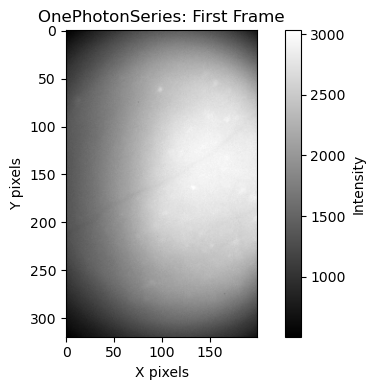

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 4.1 Plot the first frame of OnePhotonSeries
first_frame = ops.data[0, :, :]
plt.figure(figsize=(6, 4))
plt.imshow(first_frame, cmap='gray')
plt.colorbar(label='Intensity')
plt.title("OnePhotonSeries: First Frame")
plt.xlabel("X pixels")
plt.ylabel("Y pixels")
plt.tight_layout()
plt.show()

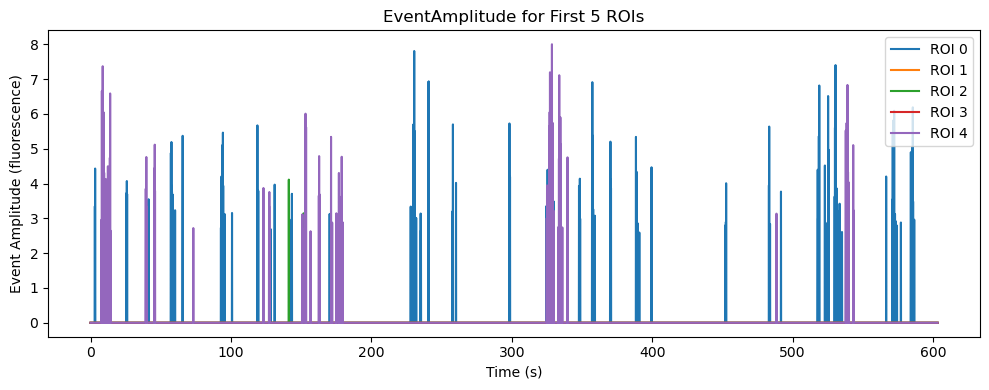

In [6]:
# 4.2 Plot EventAmplitude traces for the first 5 ROIs
import pandas as pd

roi_ids = ea.rois.table.id[:5]
times = np.arange(ea.data.shape[0]) / ea.rate

plt.figure(figsize=(10, 4))
for idx, roi in enumerate(roi_ids):
    plt.plot(times, ea.data[:, idx], label=f"ROI {roi}")
plt.legend(loc='upper right')
plt.xlabel("Time (s)")
plt.ylabel("Event Amplitude (fluorescence)")
plt.title("EventAmplitude for First 5 ROIs")
plt.tight_layout()
plt.show()

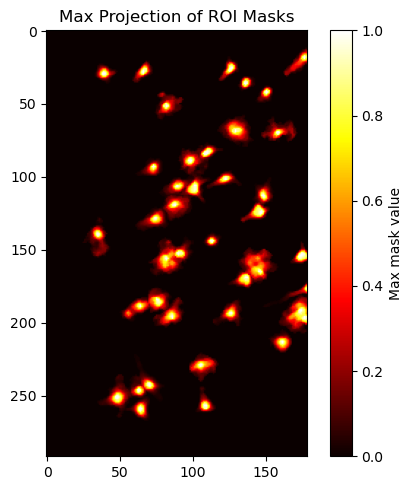

In [7]:
# 4.3 Heatmap of maximum projection of all ROI masks
masks = ea.rois.table.image_mask[:]  # shape (#ROIs, X, Y)
max_mask = np.max(masks, axis=0)

plt.figure(figsize=(5, 5))
plt.imshow(max_mask, cmap='hot')
plt.colorbar(label='Max mask value')
plt.title("Max Projection of ROI Masks")
plt.tight_layout()
plt.show()

# Link to Neurosift

Explore this NWB file interactively on Neurosift:  
https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/&dandisetId=001174&dandisetVersion=0.250331.2218

# 5. Summary and Future Directions

This notebook showed how to:
- Access Dandiset metadata and list assets.
- Load an NWB file remotely using DANDI APIs.
- Summarize NWB file structure and extract dataset shapes.
- Visualize sample frames, event amplitude traces, and ROI masks.

Possible next steps:
- Dive deeper into cell co-activity analysis.
- Correlate fluorescence with behavioral timestamps.
- Build interactive dashboards (e.g., using Plotly Dash).
- Apply advanced signal processing on fluorescence traces.